<a href="https://colab.research.google.com/github/frankfurtmacmoses/statistics_for_big_data_assignments/blob/main/Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"frankfurt","key":"0486f407b3ce3583f098ac48742f1872"}'}

In [57]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [58]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
!kaggle competitions download -c house-prices-advanced-regression-techniques

  0% 0.00/199k [00:00<?, ?B/s]
100% 199k/199k [00:00<00:00, 61.6MB/s]


In [59]:
!ls /content

 drive						  'kaggle (1).json'   sample_data
 house-prices-advanced-regression-techniques.zip   kaggle.json


In [7]:
!pwd

/content


In [16]:
!mkdir /content/drive/MyDrive/kaggle_data


mkdir: cannot create directory ‘/content/drive/MyDrive/kaggle_data’: File exists


In [17]:
!unzip /content/house-prices-advanced-regression-techniques.zip -d /content/drive/MyDrive/kaggle_data/

Archive:  /content/house-prices-advanced-regression-techniques.zip
replace /content/drive/MyDrive/kaggle_data/data_description.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [60]:
import pandas as pd

train_source = pd.read_csv('/content/drive/MyDrive/kaggle_data/train.csv')
size = train_source.size
#dim = test_source.shape
info = train_source.info
print(f"Number of rows in this dataset is: {size}",sep="")
print(f"Below is the dataset information: {info}",sep="")


Number of rows in this dataset is: 118260
Below is the dataset information: <bound method DataFrame.info of         Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20 

In [61]:
col_list = train_source.columns

train_sorted = train_source.sort_values(by=list(col_list),  ascending=True)


In [62]:
col_lotarea = train_sorted['LotArea']
#col_lotarea.head(5)



,LotArea
0,8450
1,9600
2,11250
3,9550
4,14260


In [63]:
from numpy import percentile

data_min,data_mean, data_median, data_max = col_lotarea.min(),col_lotarea.mean,col_lotarea.median,col_lotarea.max()

my_quartiles = percentile(col_lotarea,[25,50,75])

print(f'min: {data_min}')
print(f'Q1: {my_quartiles[0]}')
print(f'median: {my_quartiles[1]}')
print(f'Q3: {my_quartiles[2]}')
print(f'max: {data_max}')

IQR  = my_quartiles[2] - my_quartiles[0]

lower_range = my_quartiles[0] - (1.5 * IQR)
upper_range = my_quartiles[2] + (1.5 * IQR)

print(f'IQR: {IQR}')
print(f'lower_range: {lower_range}')
print(f'upper_range: {upper_range}')





min: 1300
Q1: 7553.5
median: 9478.5
Q3: 11601.5
max: 215245
IQR: 4048.0
lower_range: 1481.5
upper_range: 17673.5


In [84]:
## filtering out outliers from the "LotArea" column of the dataset:

outliers = train_sorted[(train_sorted["LotArea"] < IQR) | (train_sorted["LotArea"] > IQR)]

print(f'These are all my outliers points: {outliers["LotArea"]}')
lot_area_series = outliers['LotArea']
lot_area_series.head(4)


These are all my outliers points: 0        8450
1        9600
2       11250
3        9550
4       14260
        ...  
1455     7917
1456    13175
1457     9042
1458     9717
1459     9937
Name: LotArea, Length: 1460, dtype: int64


,LotArea
0,8450
1,9600
2,11250
3,9550


In [94]:
%%capture
!python -m pip install plotnine


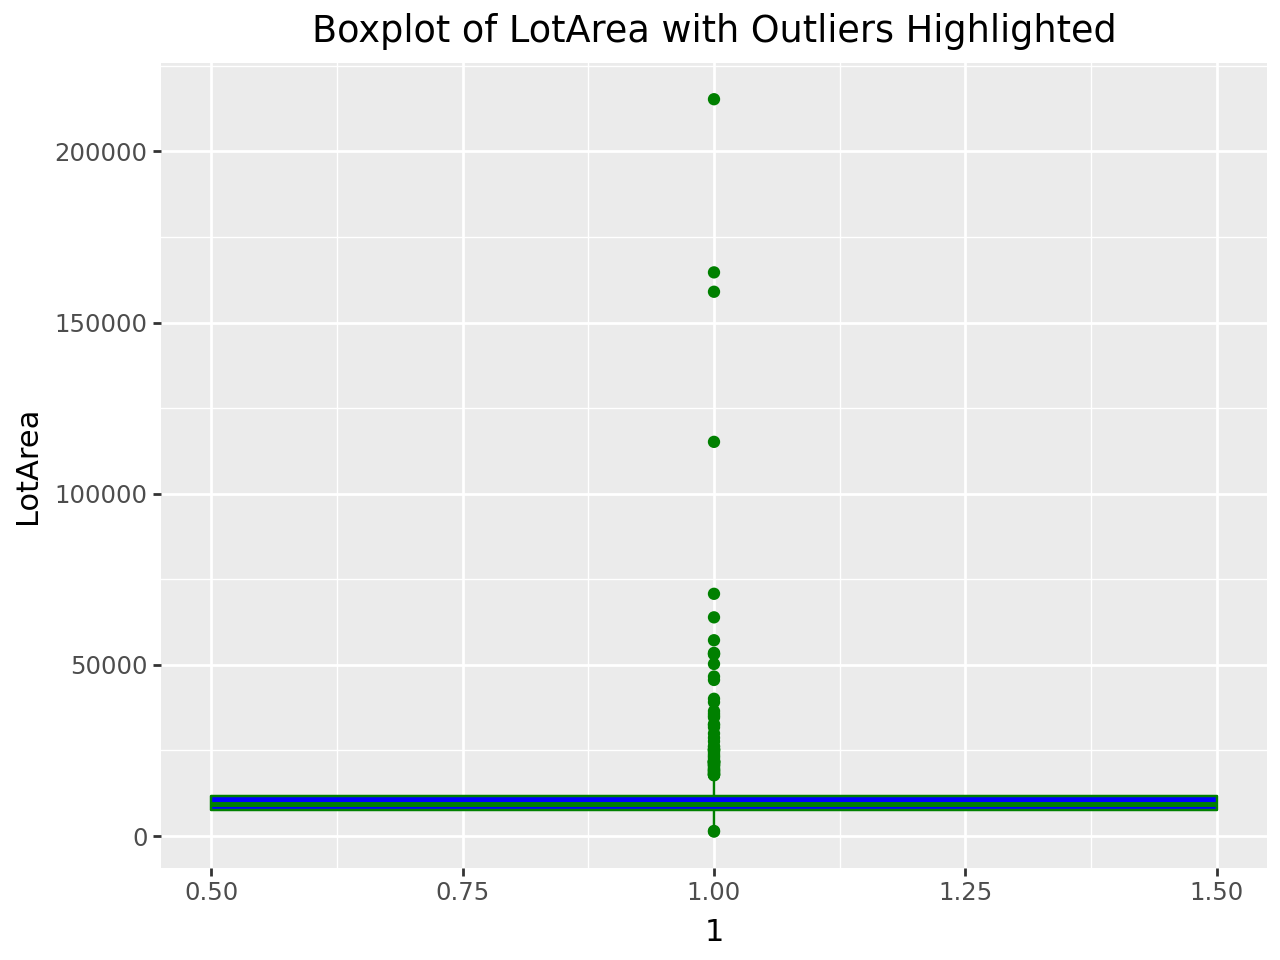

In [91]:
from plotnine import ggplot, aes, geom_line,geom_boxplot,ggtitle,geom_point,geom_density
## Convert outliers points to dataframe
outlier_points = lot_area_series.to_frame()

#plot = ( ggplot(train_sorted,aes(y='LotArea',x=1))+geom_boxplot() + geom_boxplot(width=1))
plot = (ggplot(train_sorted, aes(y='LotArea', x=1)) +
        geom_boxplot(fill='blue', color='green', width=1) +  ggtitle('Boxplot of LotArea with Outliers Highlighted'))



plot.show()

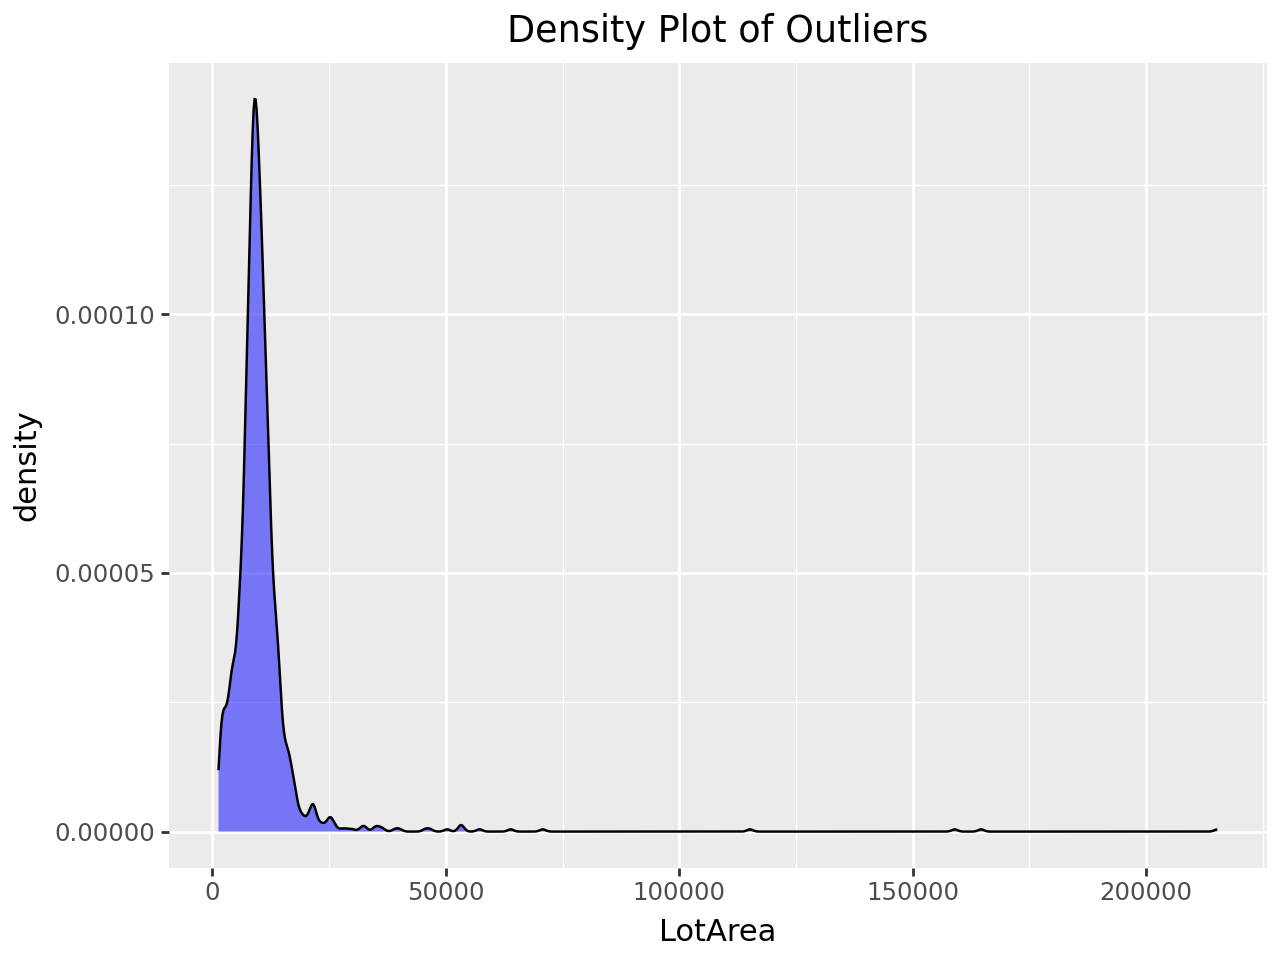

In [93]:
plot = (ggplot(outlier_points, aes(x='LotArea')) +
        geom_density(fill='blue', alpha=0.5) +  # Add density plot with blue fill
        ggtitle('Density Plot of Outliers')  # Add title
       )

plot.show()

The outliers is skewed towards the minimum value and Q1. The data has a lot of outliers which can affect the result.